In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Đọc dữ liệu từ file CSV
file_path = 'temp 180 forecast.csv'
data = pd.read_csv(file_path)

data.head()

,time_series_timestamp,time_series_type,time_series_data,time_series_adjusted_data,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,trend,seasonal_period_yearly,seasonal_period_quarterly,seasonal_period_monthly,seasonal_period_weekly,seasonal_period_daily,holiday_effect,spikes_and_dips,step_changes,residual
0,2013-12-21 00:00:00.000000 UTC,history,60.0,60.000000,3.338775,NaN,NaN,NaN,0.000000,-13.940543,NaN,NaN,7.594971,NaN,NaN,0.0,NaN,66.345572
1,2013-12-22 00:00:00.000000 UTC,history,48.0,54.687900,3.338775,NaN,NaN,NaN,66.350065,-13.214648,NaN,NaN,1.552483,NaN,NaN,0.0,NaN,-6.687900
2,2013-12-23 00:00:00.000000 UTC,history,45.0,43.501476,3.338775,NaN,NaN,NaN,60.601897,-14.054678,NaN,NaN,-3.045743,NaN,NaN,0.0,NaN,1.498524
3,2013-12-24 00:00:00.000000 UTC,history,46.0,46.669486,3.338775,NaN,NaN,NaN,65.570701,-13.777863,NaN,NaN,-5.123352,NaN,NaN,0.0,NaN,-0.669486
4,2013-12-25 00:00:00.000000 UTC,history,50.0,49.222009,3.338775,NaN,NaN,NaN,62.363604,-12.118105,NaN,NaN,-1.023490,NaN,NaN,0.0,NaN,0.777991


In [9]:
data["time_series_type"].value_counts()

history     1319
forecast     180
Name: time_series_type, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time_series_timestamp            1499 non-null   object 
 1   time_series_type                 1499 non-null   object 
 2   time_series_data                 1499 non-null   float64
 3   time_series_adjusted_data        1499 non-null   float64
 4   standard_error                   1499 non-null   float64
 5   confidence_level                 180 non-null    float64
 6   prediction_interval_lower_bound  180 non-null    float64
 7   prediction_interval_upper_bound  180 non-null    float64
 8   trend                            1499 non-null   float64
 9   seasonal_period_yearly           1499 non-null   float64
 10  seasonal_period_quarterly        0 non-null      float64
 11  seasonal_period_monthly          0 non-null      float64
 12  seasonal_period_week

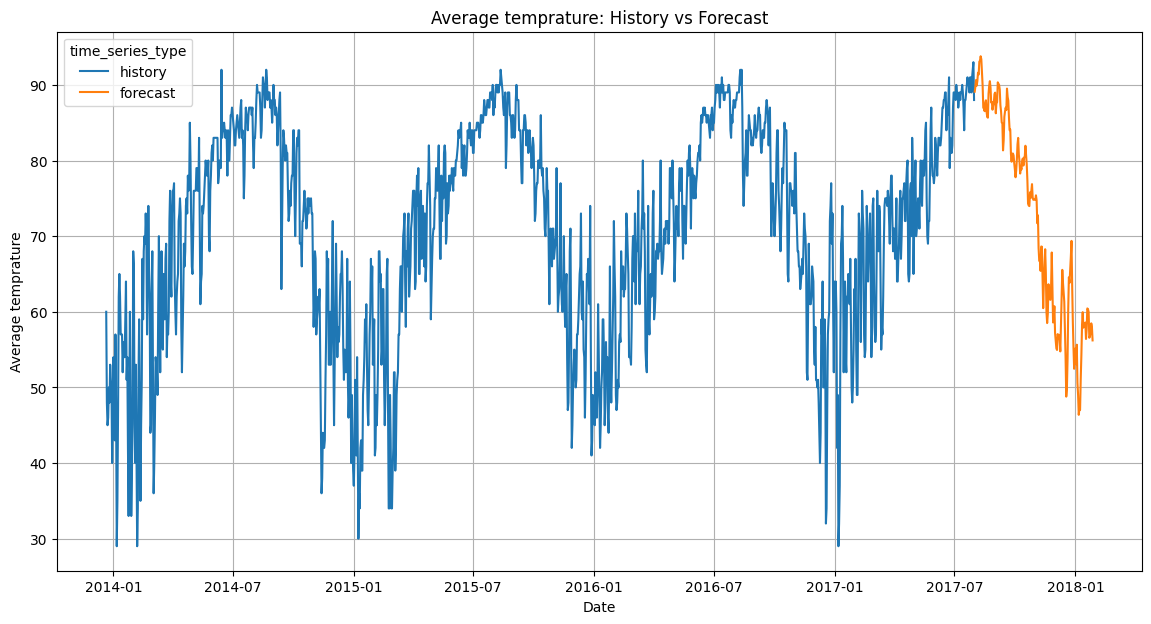

In [11]:
# Chuyển đổi cột thời gian thành định dạng datetime
data['time_series_timestamp'] = pd.to_datetime(data['time_series_timestamp'])

# Tạo biểu đồ line plot với seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='time_series_timestamp', y='time_series_data', hue='time_series_type', 
             data=data, palette='tab10')
plt.title('Average temprature: History vs Forecast')
plt.xlabel('Date')
plt.ylabel('Average temprature')
plt.grid(True)
plt.show()

ValueError: Could not interpret value `time_series_type` for parameter `hue`

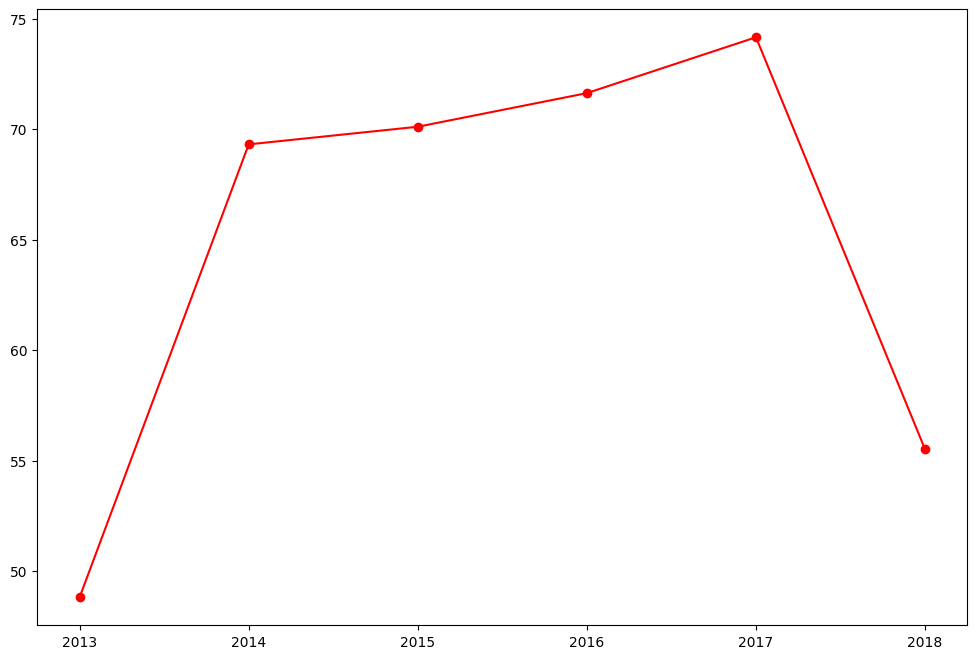

In [22]:
# Extract year for trend analysis
data['Year'] = data['time_series_timestamp'].dt.year

# Function to calculate yearly averages for specified columns
def calculate_yearly_avg(data, column):
    return data.groupby('Year')[column].mean()
avg_temp = calculate_yearly_avg(data, 'time_series_data')

plt.figure(figsize=(12, 8))
plt.plot(avg_temp.index, avg_temp.values, marker='o', label='Avg Temperature (F)', color='r')
sns.lineplot(x='Year', y=avg_temp.values, hue='time_series_type', 
             data=avg_temp, palette='tab10')
plt.title('Average Temperature Over Time in Austin')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()

In [12]:
# Đọc dữ liệu từ file CSV
file_path = 'precipitation 180 forecast.csv'
prec = pd.read_csv(file_path)

prec.head()

,time_series_timestamp,time_series_type,time_series_data,time_series_adjusted_data,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,trend,seasonal_period_yearly,seasonal_period_quarterly,seasonal_period_monthly,seasonal_period_weekly,seasonal_period_daily,holiday_effect,spikes_and_dips,step_changes,residual
0,2013-12-21 00:00:00.000000 UTC,history,0.46,0.432029,0.042771,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.072934,NaN,NaN,0.0,0.027971,0.359094
1,2013-12-22 00:00:00.000000 UTC,history,0.00,0.324618,0.042771,NaN,NaN,NaN,0.359094,NaN,NaN,NaN,-0.034477,NaN,NaN,0.0,0.027971,-0.352589
2,2013-12-23 00:00:00.000000 UTC,history,0.00,0.052859,0.042771,NaN,NaN,NaN,0.082840,NaN,NaN,NaN,-0.029981,NaN,NaN,0.0,0.027971,-0.080831
3,2013-12-24 00:00:00.000000 UTC,history,0.00,0.072024,0.042771,NaN,NaN,NaN,0.095856,NaN,NaN,NaN,-0.023832,NaN,NaN,0.0,0.027971,-0.099995
4,2013-12-25 00:00:00.000000 UTC,history,0.00,0.060383,0.042771,NaN,NaN,NaN,0.044956,NaN,NaN,NaN,0.015427,NaN,NaN,0.0,0.027971,-0.088354


In [13]:
prec["time_series_type"].value_counts()

history     1319
forecast     180
Name: time_series_type, dtype: int64

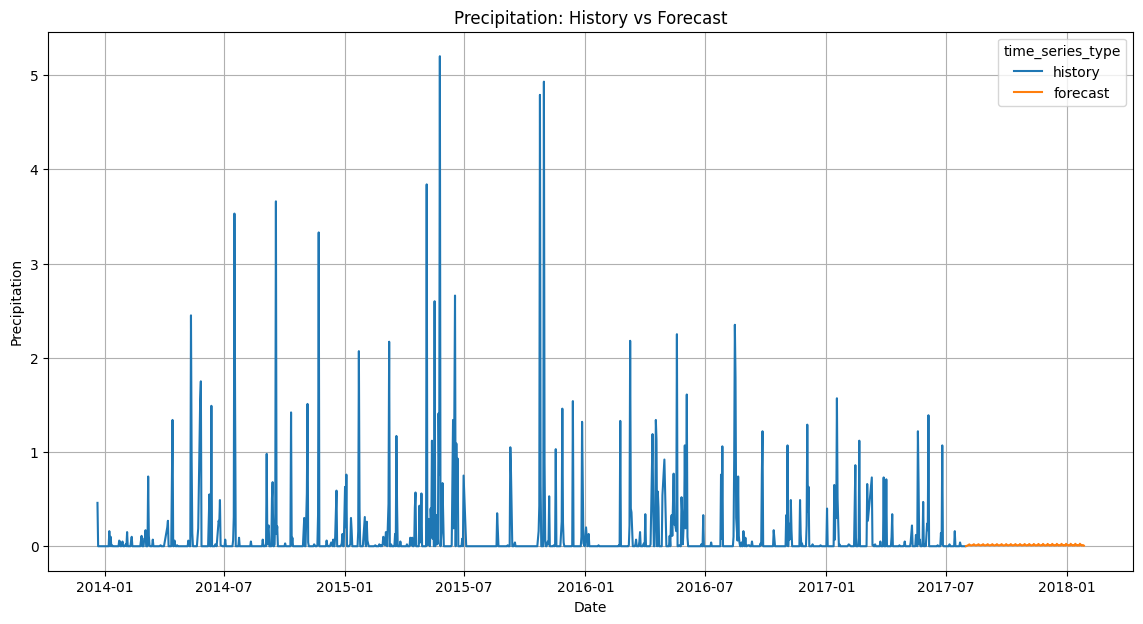

In [14]:
# Chuyển đổi cột thời gian thành định dạng datetime
prec['time_series_timestamp'] = pd.to_datetime(prec['time_series_timestamp'])

# Tạo biểu đồ line plot với seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='time_series_timestamp', y='time_series_data', hue='time_series_type', 
             data=prec, palette='tab10')
plt.title('Precipitation: History vs Forecast')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.grid(True)
plt.show()

In [15]:
vis = pd.read_csv('visi 180 forecast.csv')

vis.head()

,time_series_timestamp,time_series_type,time_series_data,time_series_adjusted_data,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,trend,seasonal_period_yearly,seasonal_period_quarterly,seasonal_period_monthly,seasonal_period_weekly,seasonal_period_daily,holiday_effect,spikes_and_dips,step_changes,residual
0,2013-12-21 00:00:00.000000 UTC,history,7.0,7.000000,1.052101,NaN,NaN,NaN,9.317435,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-2.317435
1,2013-12-22 00:00:00.000000 UTC,history,10.0,8.317979,1.052101,NaN,NaN,NaN,8.317979,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.682021
2,2013-12-23 00:00:00.000000 UTC,history,10.0,9.384803,1.052101,NaN,NaN,NaN,9.384803,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.615197
3,2013-12-24 00:00:00.000000 UTC,history,10.0,9.598857,1.052101,NaN,NaN,NaN,9.598857,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.401143
4,2013-12-25 00:00:00.000000 UTC,history,10.0,9.642298,1.052101,NaN,NaN,NaN,9.642298,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.357702


In [16]:
vis['time_series_type'].value_counts()

history     1319
forecast     180
Name: time_series_type, dtype: int64

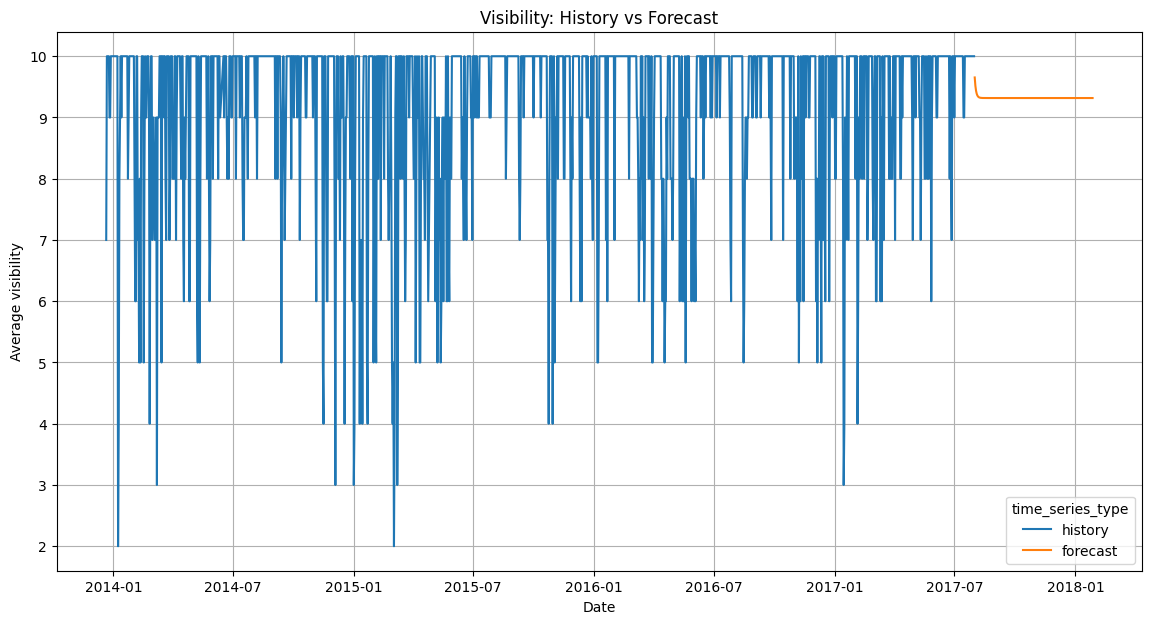

In [17]:
vis['time_series_timestamp']= pd.to_datetime(vis['time_series_timestamp'])

plt.figure(figsize=(14,7))
sns.lineplot(x='time_series_timestamp', y='time_series_data', hue='time_series_type', data=vis, palette='tab10')
plt.title('Visibility: History vs Forecast')
plt.xlabel('Date')
plt.ylabel('Average visibility')
plt.grid(True)
plt.show()